[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/yojanyzapata-ctrl/UDEA-ai4eng-20252/blob/main/02%20-%20preprocesado.ipynb)

###**Preprocesado de Datos**

En este notebook se realiza el preprocesamiento de los datos. Se incluyen operaciones de limpieza, imputación de datos faltantes, codificación (convertir columnas en one-hot o asignar valores númericos o enteros ordenados), y normalizar variables númericas, todo esto con el fin de obtener un conjunto de datos mas limpio y listo para entrenar los modelos predictivos.

####**Cargar librerías**

Se importan las librerías que se usarán para trabajar con los datos, desde  su limpieza y transformación hasta su preparación para entrenar los modelos.

In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import sparse

####**Carga del conjunto de datos**

En esta parte se configura el entorno de Kaggle y se descargan los archivos de la competencia. Luego se descomprimen para poder trabajar con ellos durante el preprocesamiento.

#####**Utilizamos la API para obtener los datos**

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "."  #Se establece la variable de entorno al directorio actual

In [ ]:
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia  # Se descargan los archivos de la competencia directamente desde la API de Kaggle

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.75GB/s]


In [ ]:
!unzip udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip # Se descomprime el fichero para acceder al contenido

Archive:  udea-ai-4-eng-20252-pruebas-saber-pro-colombia.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
train = pd.read_csv('train.csv')  # Carga del conjunto de datos de entrenamiento
train

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto,0.237,0.271,0.271,0.311
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,...,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo,0.314,0.240,0.278,0.260
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo,0.286,0.240,0.314,0.287
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,...,N,Si,Si,No,Primaria completa,bajo,0.132,0.426,0.261,0.328


##**Revisión de Columnas y Dimensión**


Antes de realizar el preprocesamiento, se revisa la estructura general del conjunto de datos.

In [ ]:
print(train.columns) # Permite visualizar los nombres de todas las columnas del dataset
print(train.shape) # Indica las dimensiones del dataset

Index(['ID', 'PERIODO_ACADEMICO', 'E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO',
       'E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA',
       'F_ESTRATOVIVIENDA', 'F_TIENEINTERNET', 'F_EDUCACIONPADRE',
       'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PRIVADO_LIBERTAD',
       'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR', 'F_TIENEINTERNET.1',
       'F_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'INDICADOR_1', 'INDICADOR_2',
       'INDICADOR_3', 'INDICADOR_4'],
      dtype='object')
(692500, 21)


##**Limpieza de datos**


Se inicia el proceso de depuración del dataset, eliminando información irrelevante, redundante o que no aporta valor al análisis ni al modelo.

###**Eliminar columnas repetidas o innecesarias**

####**Revisión de la columna ID**

In [ ]:
train["ID"].head(10) # Se visualiza la columna ID

,ID
0,904256
1,645256
2,308367
3,470353
4,989032
5,659872
6,47159
7,11829
8,257869
9,465511


 El ID sirve como identificador de cada registro individual, no tiene una relación relevante con el rendimiento académico ni aporta información útil al modelo por lo cual se eliminará

#####**Verificación de columnas duplicadas**

In [ ]:
# Validar si la columna F_TIENEINTERNET.1 está repetida
train['F_TIENEINTERNET'].equals(train['F_TIENEINTERNET.1']) # Compara si es exactamente igual a F_TIENEINTERNET

True

 Como ambas columnas son idénticas, se eliminará una para evitar redundancia

#####**Revisión de la variable 'E_PRIVADO_LIBERTAD'**

In [ ]:
# Se analiza la proporción de personas privadas de la libertad
train["E_PRIVADO_LIBERTAD"].value_counts(dropna=False)

,count
E_PRIVADO_LIBERTAD,
N,692466
S,34


La cantidad de personas con valor "S" (privadas de la libertad) es extremadamente baja comparada con "N". Dado que esta variable no aporta información relevante al modelo, se decidió eliminarla del conjunto de datos

#####**Revisión de la variable 'PERIODO_ACADEMICO'**

In [ ]:
# Validar la relevancia del PERIODO_ACADEMICO
print(train["PERIODO_ACADEMICO"].value_counts(dropna=False)) # Se revisa la distribución de los registros por periodo académico

#calcular los porcentajes de los periodos con más y menos datos
mayores = train["PERIODO_ACADEMICO"].value_counts().nlargest(4).sum() # Suma de los 4 periodos con más registros
menores = train["PERIODO_ACADEMICO"].value_counts().nsmallest(5).sum() # Suma de los 5 periodos con menos registros

total = train["PERIODO_ACADEMICO"].value_counts().sum() # Total de registros del dataset
porcentaje_may = (mayores / total) * 100 #Calcular qué porcentaje del total representan los periodos con más registros
porcentaje_men = (menores / total) * 100 #Calcular qué porcentaje del total representan los periodos con menos registros
print(porcentaje_may, porcentaje_men)

PERIODO_ACADEMICO
20195    180873
20203    171838
20212    171412
20183    164818
20194      1472
20213      1178
20202       490
20184       254
20196       165
Name: count, dtype: int64
99.48606498194947 0.5139350180505415


De acuerdo con los porcentajes calculados, se observa que la mayoría de los registros se concentran en pocos periodos académicos, mientras que los demás representan una cantidad minima de datos.
Dado esto, el modelo podría tener sesgos asociados a los periodos con más registros. Por esta razón, no se tendrá en cuenta esta variable en el modelo.

#####**Eliminación de las columnas revisadas**

In [ ]:
del(train["ID"]) # No es relevante para el modelo, ya que no tiene mucha relación con el rendimiento ni aporta información predicitva
del(train["F_TIENEINTERNET.1"]) # Columna duplicada de 'F_TIENEINTERNET.1', se elimina para evitar redundancia
del(train["E_PRIVADO_LIBERTAD"]) # Tiene una proporción mínima de casos en una categoría, por lo tanto no es relevante
del(train["PERIODO_ACADEMICO"]) # Se elimina debido al desbalance de datos entre periodos.

#####**Verificación de las columnas restantes**

In [ ]:
print(train.columns) # Estas son las variables que permanecen después de la limpieza del dataset

Index(['E_PRGM_ACADEMICO', 'E_PRGM_DEPARTAMENTO',
       'E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA',
       'F_ESTRATOVIVIENDA', 'F_TIENEINTERNET', 'F_EDUCACIONPADRE',
       'F_TIENELAVADORA', 'F_TIENEAUTOMOVIL', 'E_PAGOMATRICULAPROPIO',
       'F_TIENECOMPUTADOR', 'F_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL',
       'INDICADOR_1', 'INDICADOR_2', 'INDICADOR_3', 'INDICADOR_4'],
      dtype='object')


Luego de eliminar las columnas innecesarias, se revisa si las variables restantes contienen valores faltantes para decidir cómo tratarlos.

###**Visualización de Columnas con Datos Faltantes**



In [ ]:
col_Nanh = train.isna().sum()
col_Nanh[col_Nanh!=0]

,0
E_VALORMATRICULAUNIVERSIDAD,6287
E_HORASSEMANATRABAJA,30857
F_ESTRATOVIVIENDA,32137
F_TIENEINTERNET,26629
F_EDUCACIONPADRE,23178
F_TIENELAVADORA,39773
F_TIENEAUTOMOVIL,43623
E_PAGOMATRICULAPROPIO,6498
F_TIENECOMPUTADOR,38103
F_EDUCACIONMADRE,23664


A continuación, se utiliza la función del laboratorio 0.4.02 -DATA CLEANING para analizar cómo se comportan las variables que contienen valores nulos con respecto al rendimiento global.
Este análisis permite observar si los valores faltantes siguen un patrón o se distribuyen de manera similar al resto de los valores; esto nos ayuda a decidir como imputarlos correctamente.


In [ ]:
## KEEPOUTPUT
def plot_missing(col, target):
    #grafico 1. Ver la distribución de la variable
    def f1():
        if train[col].dtype==object:
          #Si la variable es categórica, se reemplazan datos faltantes por la palabra "missing"
            k = train[col].fillna("missing").value_counts()
            sns.barplot(x=k.index, y=k.values)
        else:
          #Si la variable es númerica, se muestra histograma de valores no nulos
            plt.hist(train[col].dropna().values, bins=100)
        plt.title("distribution of %s"%col)
        plt.grid()
   #grafico 2. Relación entre la variable y la variable objetivo (target)
    def f2():
        if train[col].dtype==object:
            k=train[[col,target]].dropna()
            for v in train[col].dropna().unique():
                #Muestra distribución del target según cada categoría
                if sum(k[col]==v)>1:
                    sns.histplot(k[target][k[col]==v], kde=True,
                                 label=v, alpha=.3);
            #Muestra los nulos (missing) en una categoria aparte
            if sum(train[col].isna())>1:
                sns.histplot(train[target][train[col].isna()],
                             alpha=.8, kde=True,
                             label="missing")
            plt.legend();
        else:
            plt.scatter(train[col], train[target], alpha=.5)
            plt.xlabel(target)
            plt.ylabel(col)
        plt.grid()
        plt.title("%s vs target"%(col))
    #grafico 3. Comparación entre registros con y sin valores faltantes
    def f3():
        n = np.sum(train[col].isna())
        if n>1:
            sns.histplot(train[target][train[col].isna()], color="red", kde=True, alpha=.3, label="missing (%d values)"%n)
        sns.histplot(train[target][~train[col].isna()], color="blue", kde=True, alpha=.3, label="ok (%d values)"%(len(train)-n))
        plt.title("distribution of target wrt %s"%col)
        plt.yticks([])
        plt.grid()
        plt.legend()

    #Mostrar los tres gráficos en una misma figura
    fig, axes = plt.subplots(1,3, figsize=(20,6))
    plt.sca(axes[0]); f1()
    plt.sca(axes[1]); f2()
    plt.sca(axes[2]); f3()
    plt.tight_layout()
    plt.show()

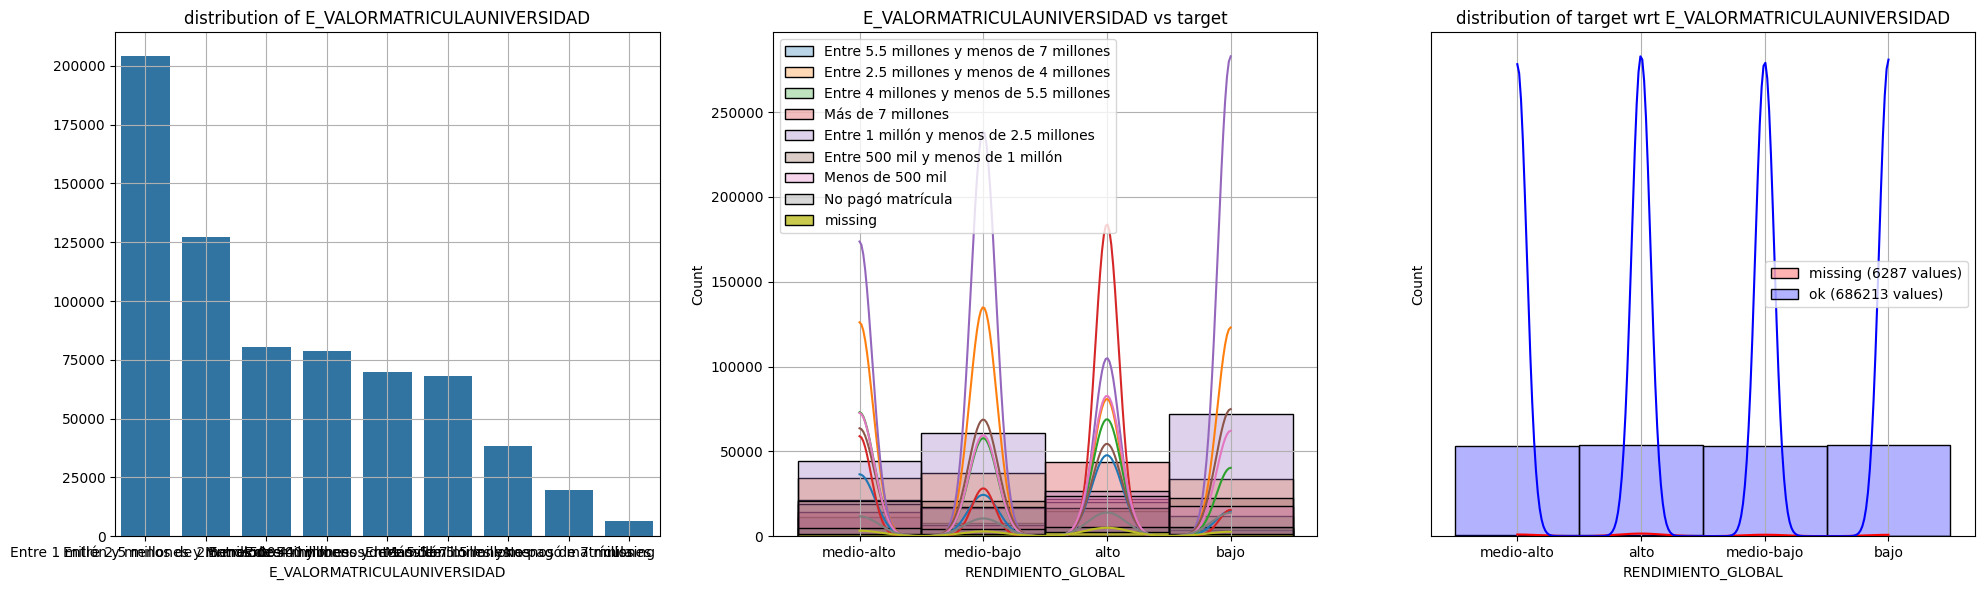

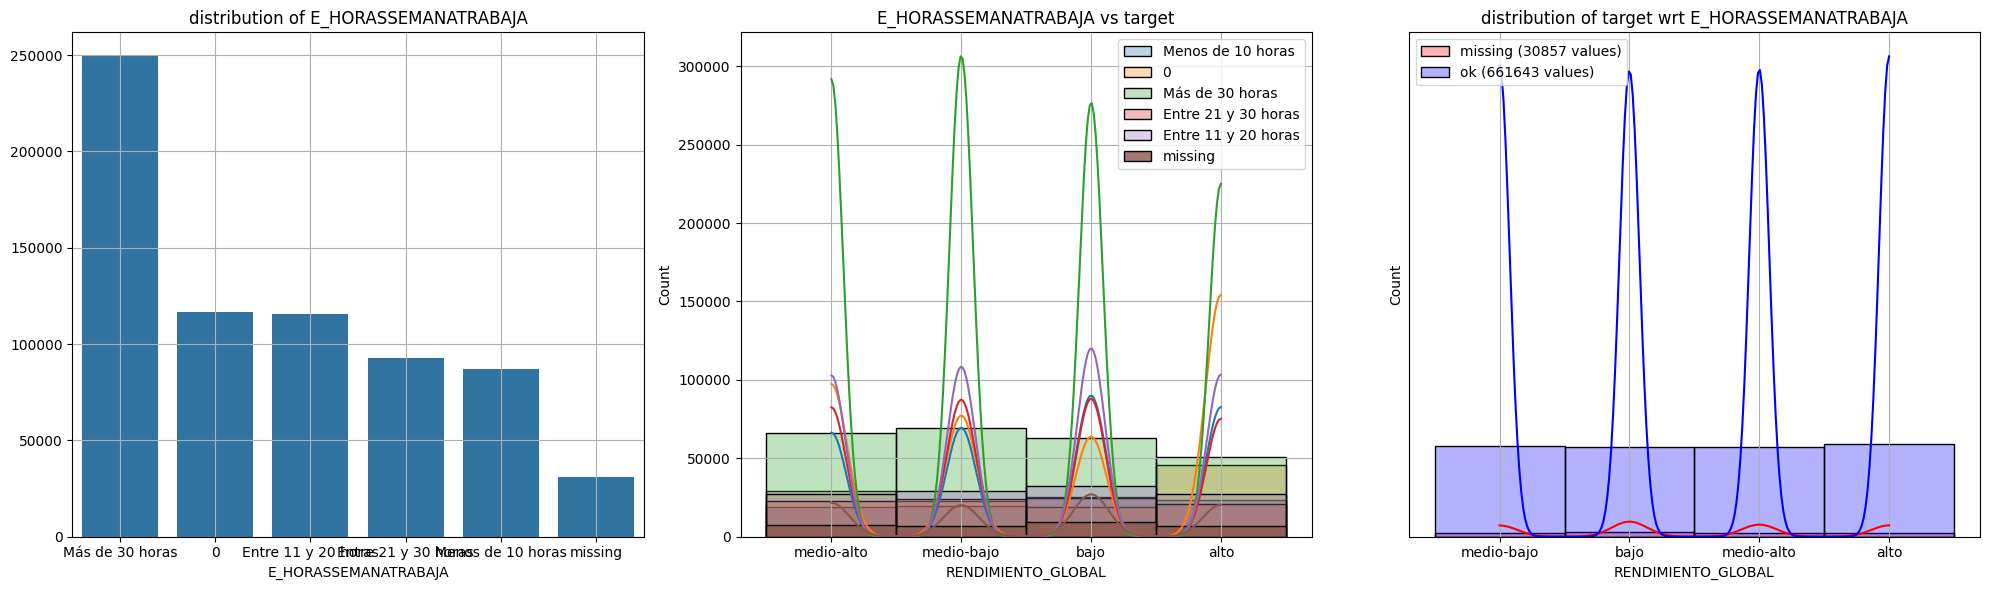

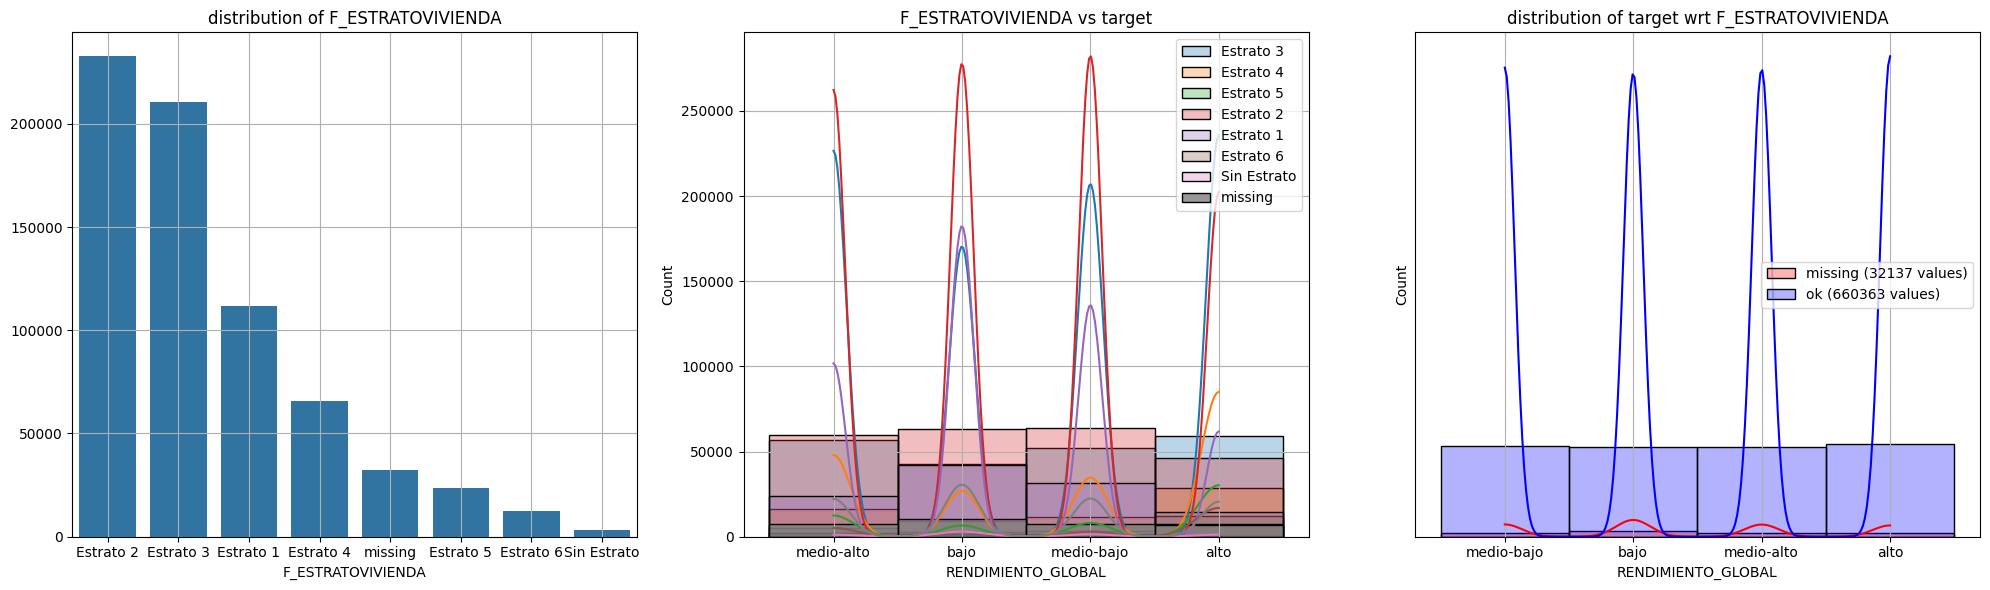

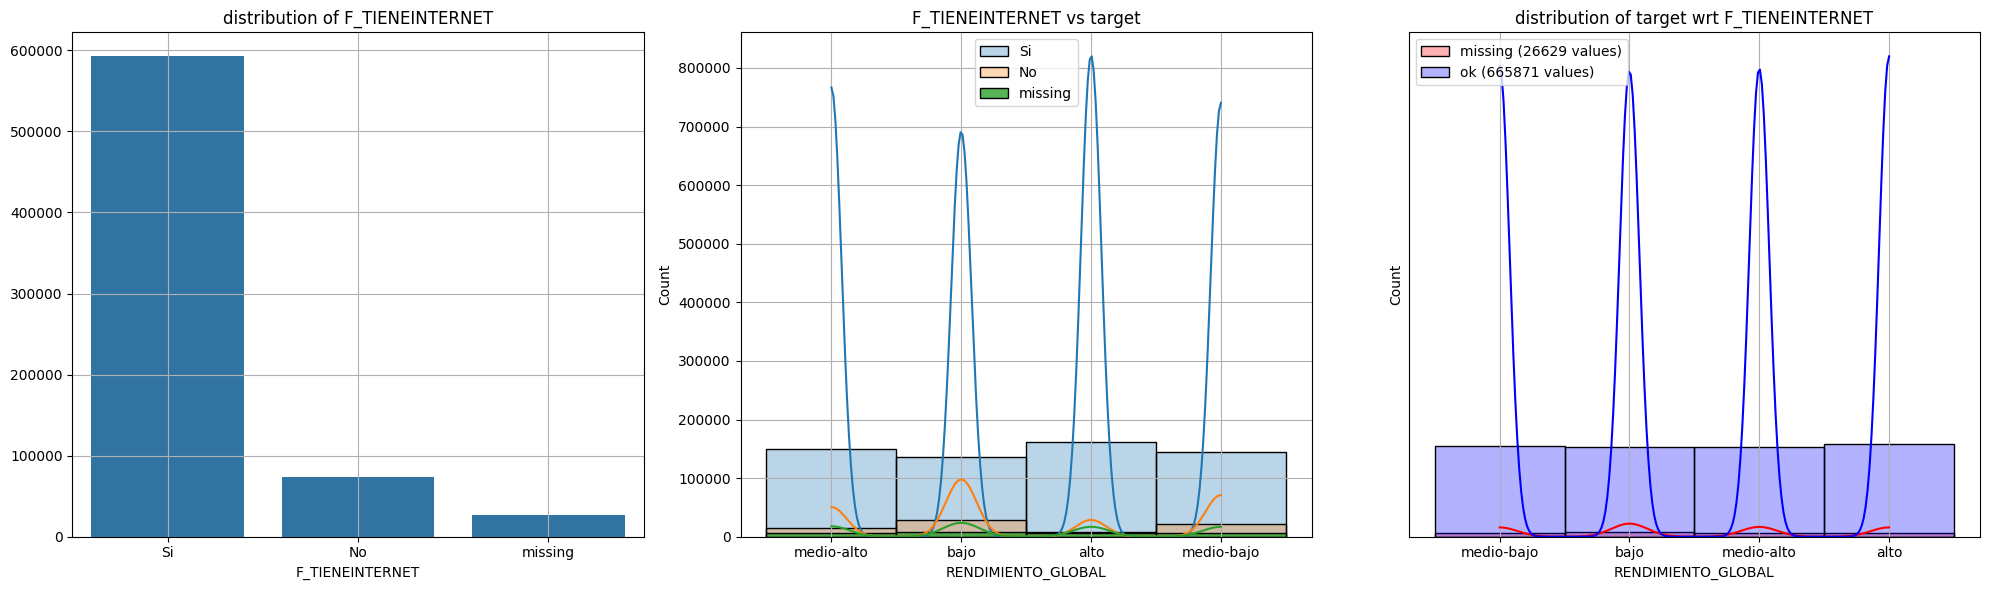

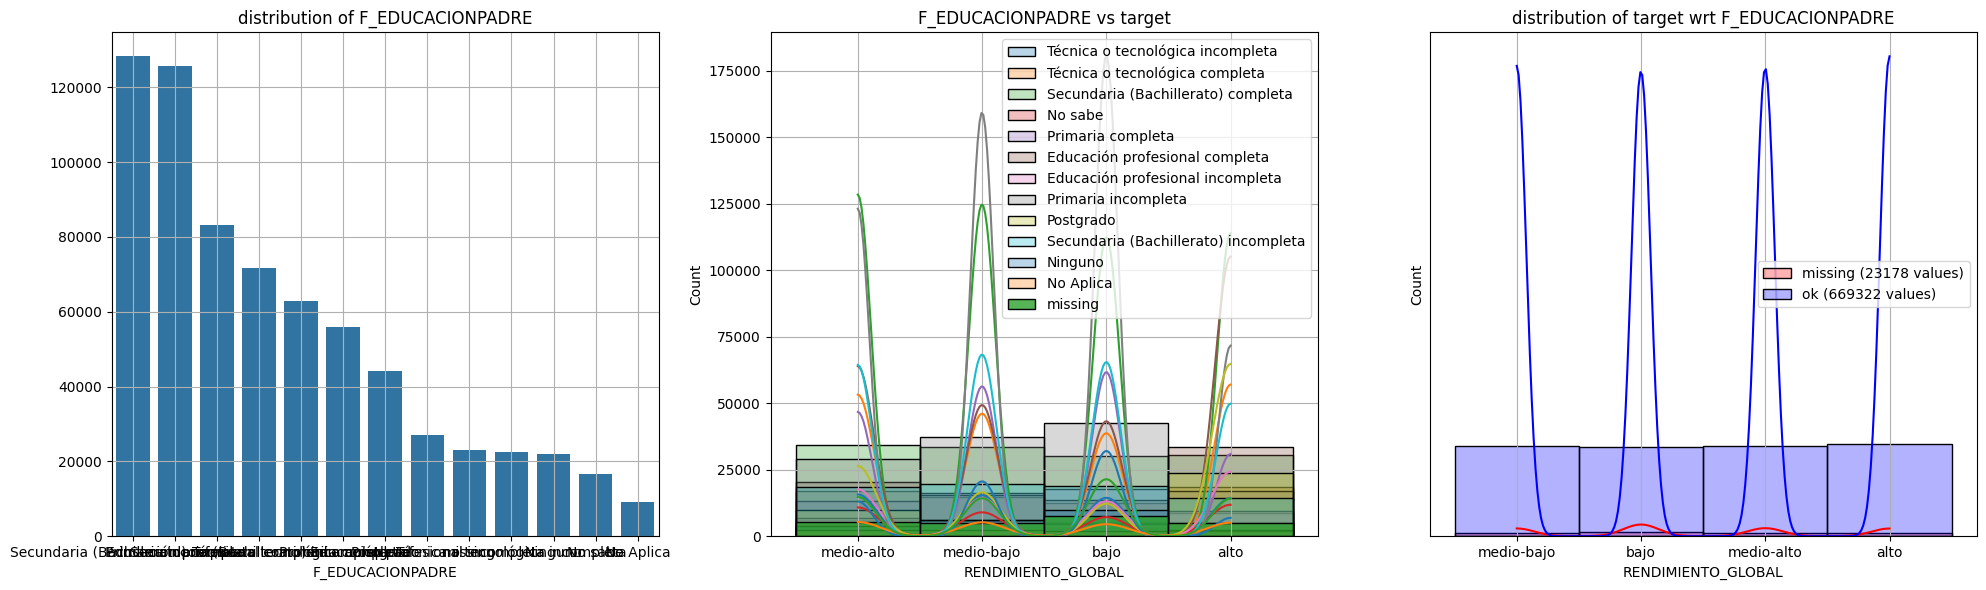

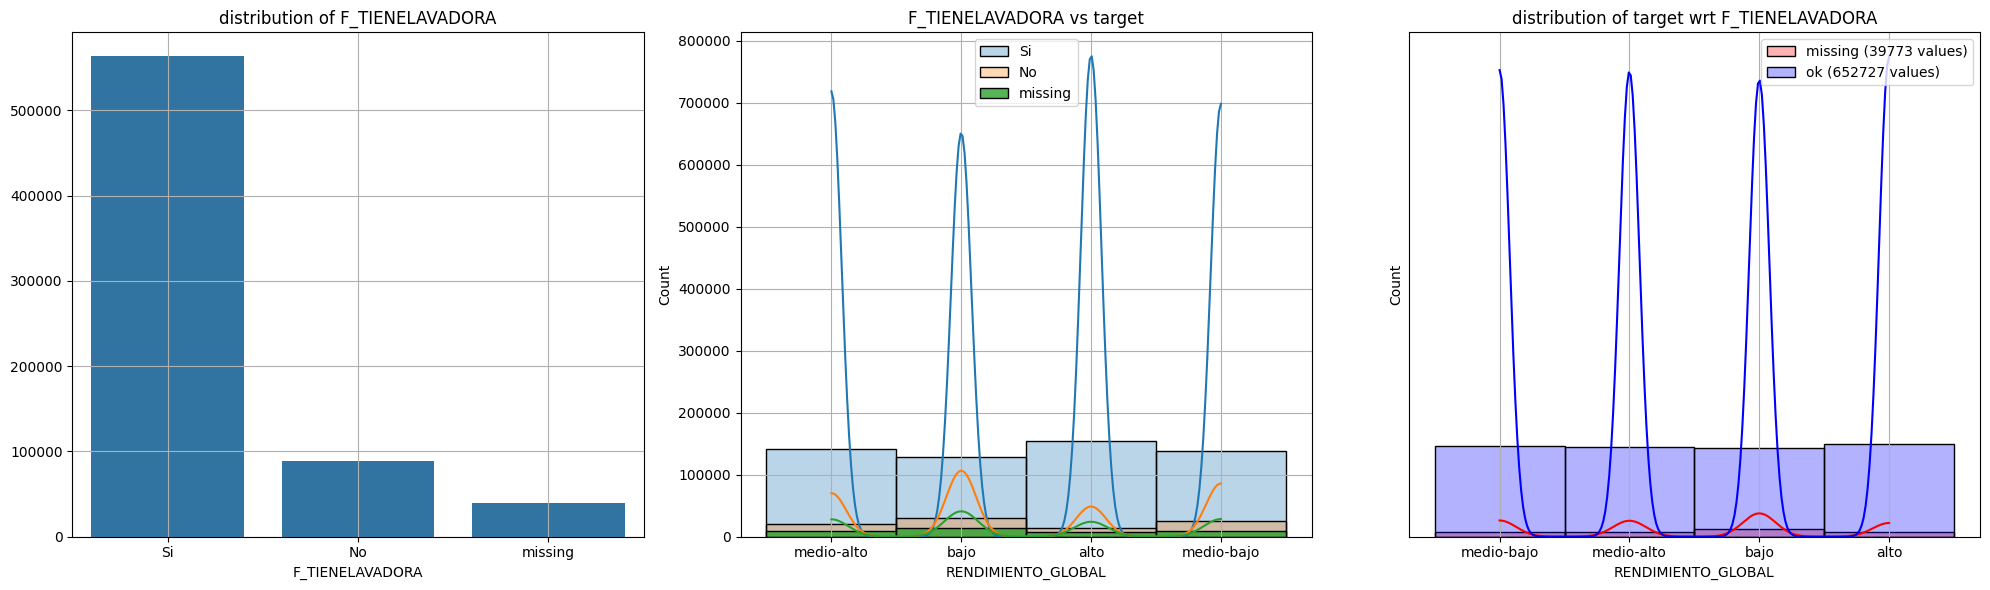

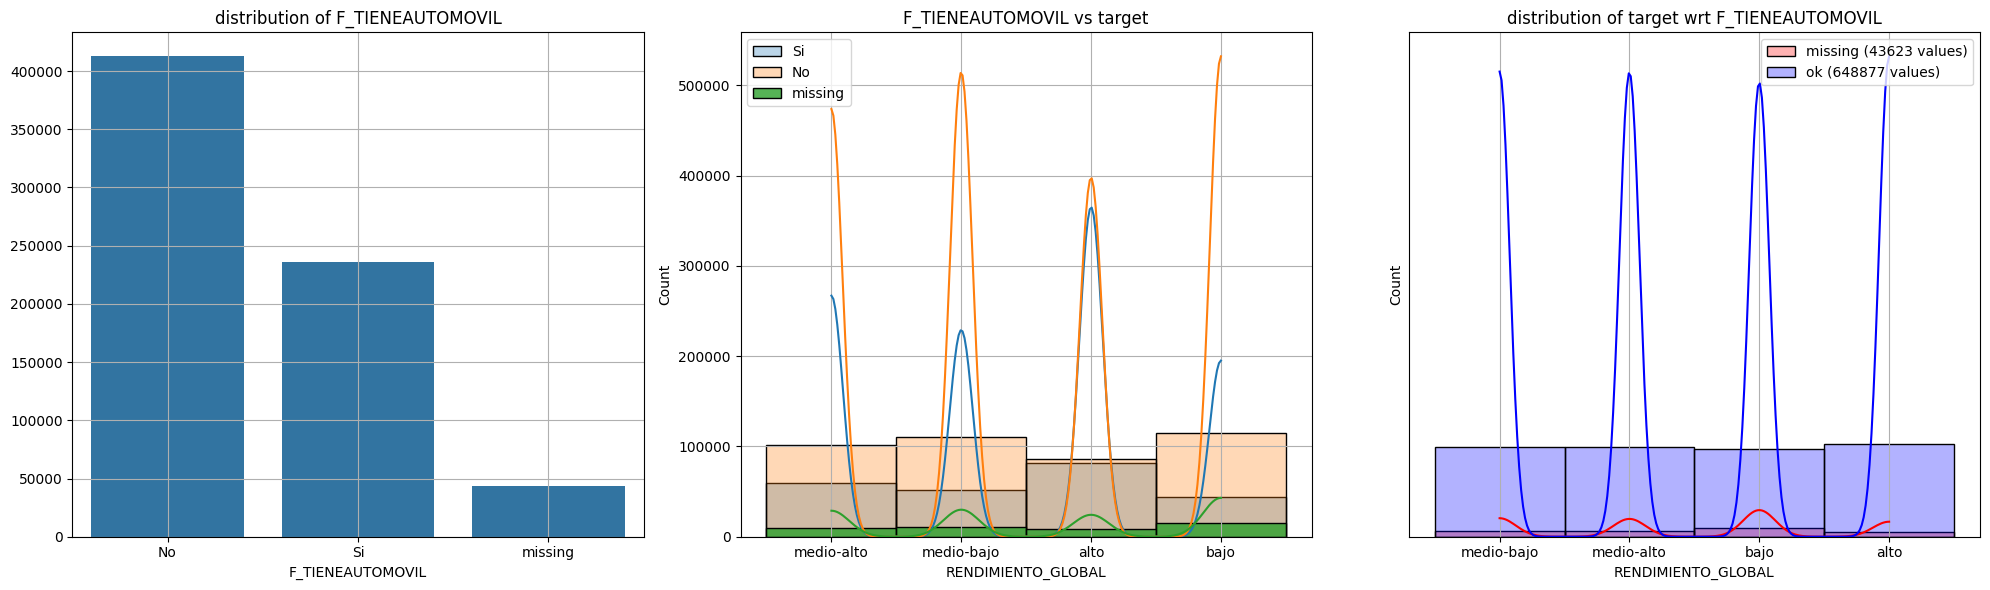

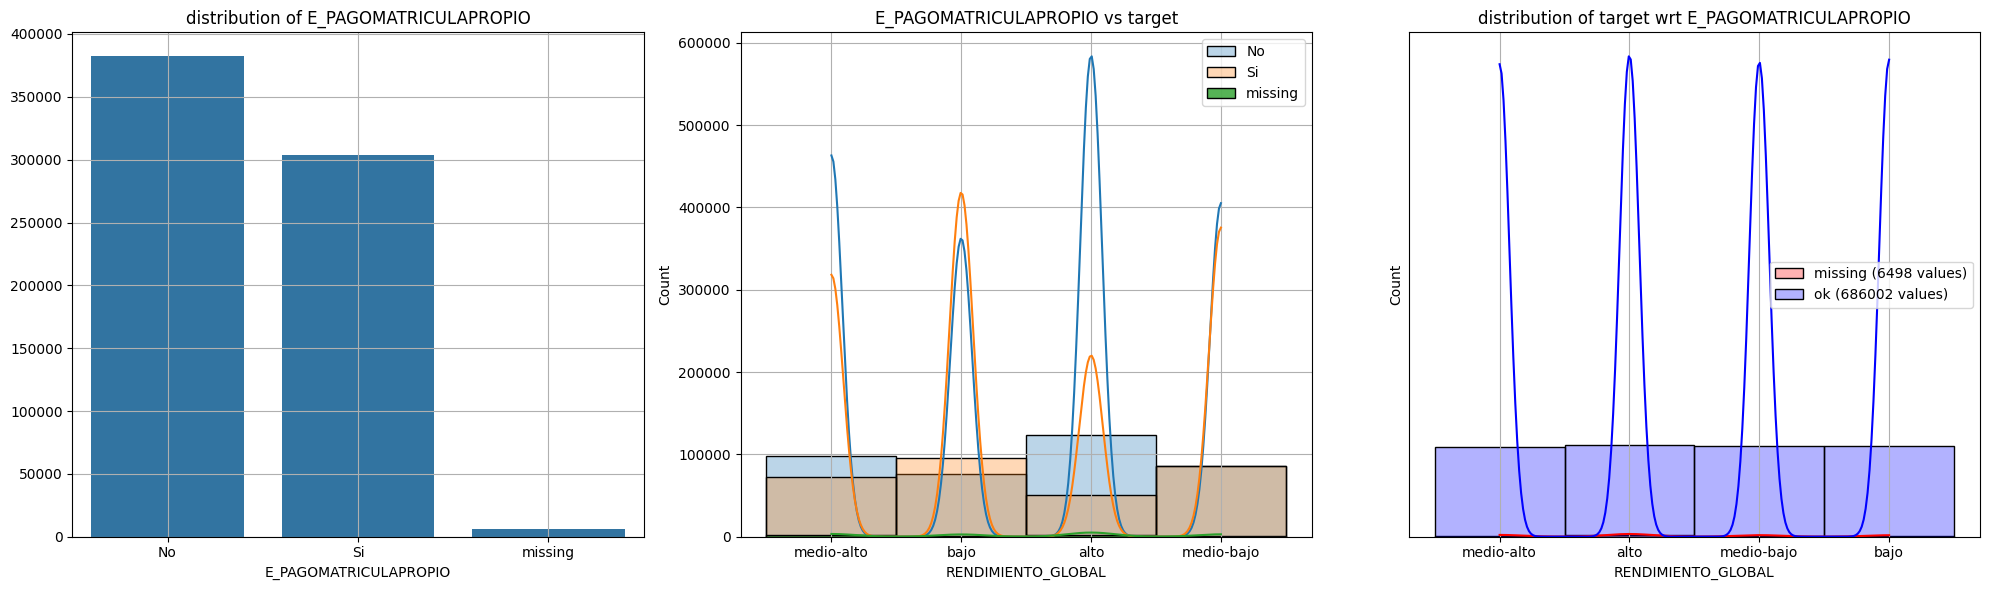

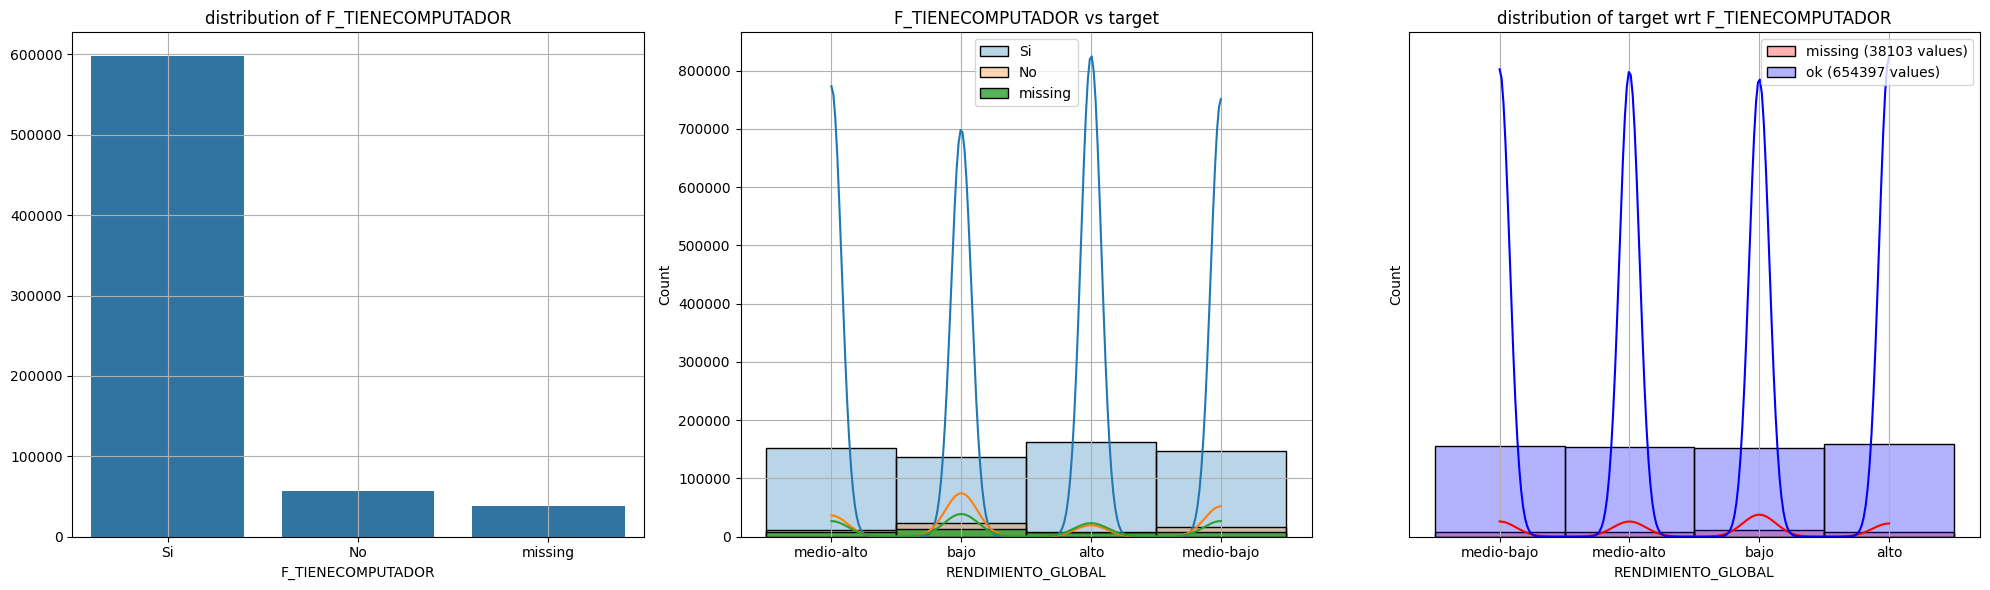

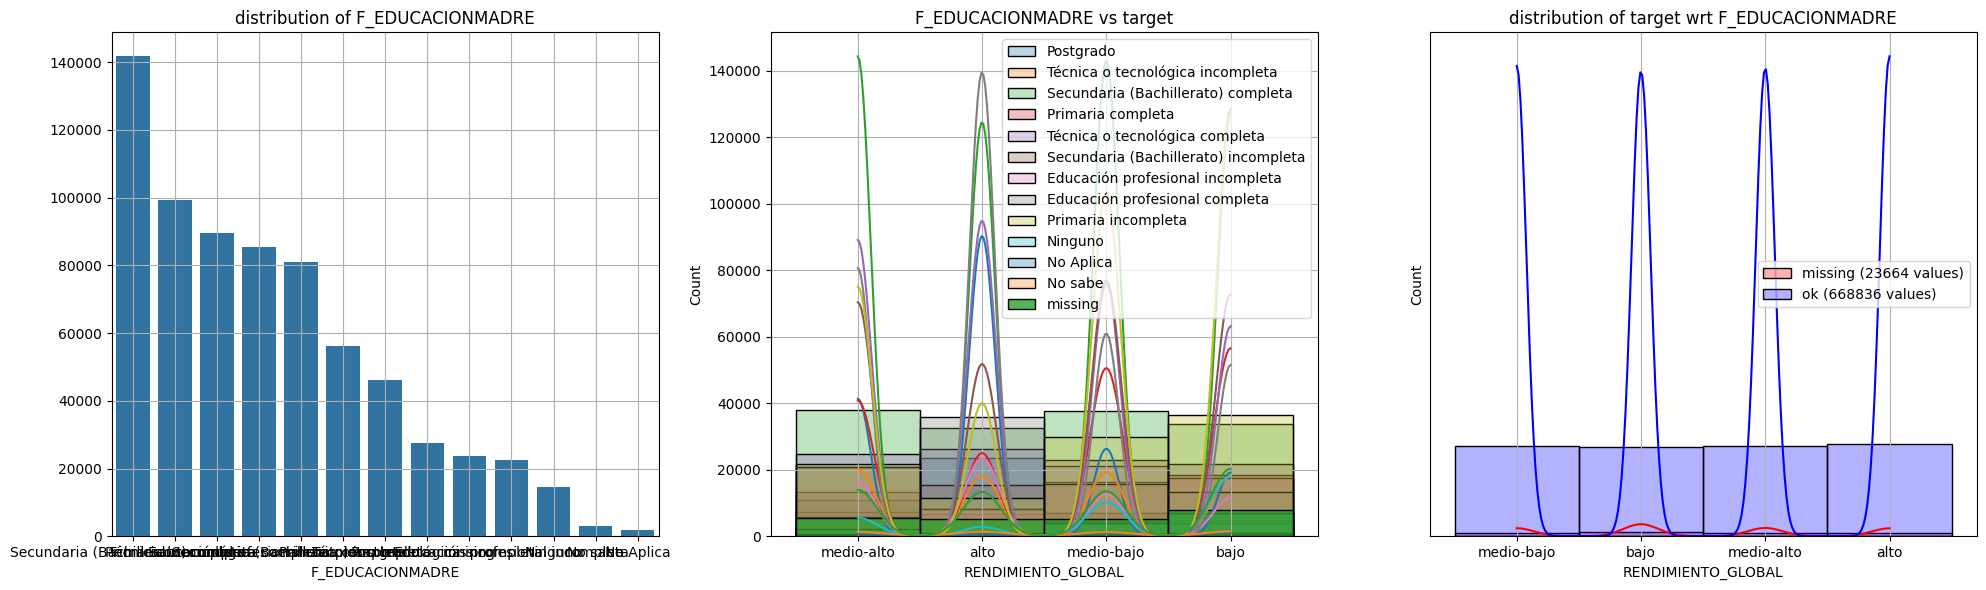

In [ ]:
#Recorrer las columnas que tienen valores faltantes
for col in col_Nanh[col_Nanh!=0].index:
    plot_missing(col, target="RENDIMIENTO_GLOBAL") #utilizar la función para analizar la relación entre los nulos y el rendimiento global

####**Conclusión**

Al revisar los gráficos de cada variable con valores faltantes, se observa que, en general, los datos nulos no presentan un comportamiento distinto frente al rendimiento global. Es decir, los estudiantes con datos faltantes se distribuyen de forma parecida al resto.

Dado que todas la variables con valores faltantes son categóricas, decidimos reemplezarlos por una nueva categoría denominada "missing", con el objetivo de conservar la información sin eliminar registros del conjunto de datos ni reemplazarlos con valores existentes.

##**Tratamiento de Datos Faltantes**

In [ ]:
train = train.fillna("missing") # Se reemplazan los valores faltantes de las variables categóricas por categoría "missing"

Después de completar el tratamiento de los valores faltantes, se reliza la transformación de las variables categóricas.

Las variables con un orden natural (como niveles educativos, estratos, entre otras) se convierten en valores númericos enteros ordenados, excepto E_VALORMATRICULAUNIVERSIDAD que se convertirá en una variable continua. Mientras que aquellas sin orden (como si tiene internet, lavadora, computadora entre otras) se condifican mediante one-hot-encondign, generando nuevas columnas binarias.

##**Codificación de Variables Categóricas con One Hot**

Transformación de las variables categóricas en columnas binarias mediante One Hot, para que el modelo puedan interpretar correctamente variables no numéricas.

In [ ]:
#Variables categóricas sin orden que se transformarán mediante One-Hot Encoding
#F_TIENEINTERNET
#F_TIENELAVADORA
#F_TIENEAUTOMOVIL
#E_PAGOMATRICULAPROPIO
#F_TIENECOMPUTADOR
#E_PRGM_ACADEMICO
#E_PRGM_DEPARTAMENTO

In [ ]:
#Estas funciones permiten trasnformar las variables categóricas en formato One-Hot
def to_onehot(x): # Convierte una variable categórica a formato One Hot
    values = np.unique(x)
    r = np.r_[[np.argwhere(i == values)[0][0] for i in x]]
    onehot_sparse = sparse.csr_matrix(
        (np.ones(len(r)), (np.arange(len(r)), r)),
        shape=(len(r), len(values))
    )
    return onehot_sparse, values

# Reemplaza una columna por su versión One Hot
def replace_column_with_onehot(d, col):
    assert sum(d[col].isna()) == 0, "column must have no NaN values"
    k_sparse, values = to_onehot(d[col].values)
    k = pd.DataFrame.sparse.from_spmatrix(
        k_sparse,
        columns=["%s_%s" % (col, values[i]) for i in range(k_sparse.shape[1])],
        index=d.index
    )
    r = k.join(d)
    del (r[col])
    return r

# Aplica One-Hot Encoding a múltiples columnas categóricas
def aplicar_onehot_a_varias(df, columnas):
    df_datos = df.copy()
    for col in columnas:
        df_datos = replace_column_with_onehot(df_datos, col)
    return df_datos


In [ ]:
df_train = aplicar_onehot_a_varias(
    train,
    [
        "F_TIENEINTERNET",
        "F_TIENELAVADORA",
        "F_TIENEAUTOMOVIL",
        "E_PAGOMATRICULAPROPIO",
        "F_TIENECOMPUTADOR",
        "E_PRGM_DEPARTAMENTO",
        "E_PRGM_ACADEMICO"
    ]
)  # Aplica One Hot a las variables categóricas seleccionadas

In [ ]:
df_train.head(10) #visualizar las primerras filas del dataset codificado

,E_PRGM_ACADEMICO_3° CICLO PROFESIONAL NEGOCIOS INTERNACIONALES,E_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,E_PRGM_ACADEMICO_ACUICULTURA,E_PRGM_ACADEMICO_ADMINISTRACION,E_PRGM_ACADEMICO_ADMINISTRACION FINANCIERA,E_PRGM_ACADEMICO_ADMINISTRACION & SERVICIO,E_PRGM_ACADEMICO_ADMINISTRACION AERONAUTICA,E_PRGM_ACADEMICO_ADMINISTRACION AGROPECUARIA,E_PRGM_ACADEMICO_ADMINISTRACION AMBIENTAL,E_PRGM_ACADEMICO_ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES,...,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_EDUCACIONPADRE,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,0,0,0,0,0,0,0,0,0,0,...,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Técnica o tecnológica incompleta,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,0,0,0,0,0,0,0,0,0,0,...,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,Técnica o tecnológica completa,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,0,0,0,0,0,0,0,0,0,0,...,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,0,0,0,0,0,0,0,0,0,0,...,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,No sabe,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,0,0,0,0,0,0,0,0,0,0,...,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Primaria completa,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294
5,0,0,0,0,0,0,0,0,0,0,...,Más de 7 millones,Menos de 10 horas,Estrato 5,Educación profesional completa,Secundaria (Bachillerato) completa,medio-alto,0.553,0.142,0.248,0.175
6,0,0,0,0,0,0,0,0,0,0,...,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Educación profesional incompleta,Técnica o tecnológica completa,alto,0.242,0.299,0.267,0.308
7,0,0,0,0,0,0,0,0,0,0,...,Entre 1 millón y menos de 2.5 millones,Entre 11 y 20 horas,Estrato 2,Primaria incompleta,Secundaria (Bachillerato) incompleta,medio-bajo,0.238,0.316,0.286,0.290
8,0,0,0,0,0,0,0,0,0,0,...,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 1,Secundaria (Bachillerato) completa,Educación profesional incompleta,medio-bajo,0.147,0.407,0.212,0.328
9,0,0,0,0,0,0,0,0,0,0,...,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 5,Postgrado,Postgrado,alto,0.535,0.122,0.257,0.167


##**Codificación de variables categóricas ordinales**

In [ ]:
#Variables categóricas con orden que se transformarán mediante codificación ordinal
#E_VALORMATRICULAUNIVERSIDAD
#E_HORASSEMANATRABAJA
#F_ESTRATOVIVIENDA
#F_EDUCACIONPADRE
#F_EDUCACIONMADRE
#RENDIMIENTO_GLOBAL

In [ ]:
def codificar_ordinal(df, mapeos):
    # Aplica codificación ordinal a las columnas especificadas en 'mapeos'
    # cada categoría es reemplazada por un número según su jerarquía.
    df_copia = df.copy()
    for col, mapa in mapeos.items():
        if col in df_copia.columns:
            df_copia[col] = df_copia[col].map(mapa)

    return df_copia

 Aquí se asignan valores numéricos a cada categoría de las variables, los números reflejan el orden natural de las categorías (de menor a mayor).

In [ ]:
mapeos = {
    'E_VALORMATRICULAUNIVERSIDAD': {
        'missing': -1,
        'No pagó matrícula': 0,
        'Menos de 500 mil': 0.25,
        'Entre 500 mil y menos de 1 millón': 0.75,
        'Entre 1 millón y menos de 2.5 millones': 1.75,
        'Entre 2.5 millones y menos de 4 millones': 3.25,
        'Entre 4 millones y menos de 5.5 millones': 4.25,
        'Entre 5.5 millones y menos de 7 millones': 6.25,
        'Más de 7 millones': 8
    },
    'E_HORASSEMANATRABAJA': {
        'missing': -1,
        '0': 0,
        'Menos de 10 horas': 1,
        'Entre 11 y 20 horas': 2,
        'Entre 21 y 30 horas': 3,
        'Más de 30 horas': 4
    },
    'F_ESTRATOVIVIENDA': {
        'missing': -1,
        'Sin Estrato': 0,
        'Estrato 1': 1,
        'Estrato 2': 2,
        'Estrato 3': 3,
        'Estrato 4': 4,
        'Estrato 5': 5,
        'Estrato 6': 6
    },
    'F_EDUCACIONPADRE': {
        'missing': -2,
        'No sabe': -1,
        'No Aplica': 0,
        'Ninguno': 1,
        'Primaria incompleta': 2,
        'Primaria completa': 3,
        'Secundaria (Bachillerato) incompleta': 4,
        'Secundaria (Bachillerato) completa': 5,
        'Técnica o tecnológica incompleta': 6,
        'Técnica o tecnológica completa': 7,
        'Educación profesional incompleta': 8,
        'Educación profesional completa': 9,
        'Postgrado': 10,
    },
    'F_EDUCACIONMADRE': {
        'missing': -2,
        'No sabe': -1,
        'No Aplica': 0,
        'Ninguno': 1,
        'Primaria incompleta': 2,
        'Primaria completa': 3,
        'Secundaria (Bachillerato) incompleta': 4,
        'Secundaria (Bachillerato) completa': 5,
        'Técnica o tecnológica incompleta': 6,
        'Técnica o tecnológica completa': 7,
        'Educación profesional incompleta': 8,
        'Educación profesional completa': 9,
        'Postgrado': 10,
    },
    'RENDIMIENTO_GLOBAL': {
        'bajo': 0, 'medio-bajo': 1, 'medio-alto': 2, 'alto': 3
    }
}


In [ ]:
#Se aplica la codificación ordinal a las variables categóricas según los mapeos definidos
df_train_map = codificar_ordinal(df_train, mapeos)

El dataframe df_train_map ya tiene las variables transformadas, tanto las One-Hot como las ordinales, por lo que ahora se puede continuar con la normalización de las variables númericas.

##**Normalización de Columnas**

En esta parte se hace la normalización de las variables numéricas, incluyendo la variable E_VALORMATRICULAUNIVERSIDAD, que en el mapeo anterior se transformó en una variable continua. Esto permite que todas las variables tengan la misma escala (0-1) y evita que unas influyan más que otras en el entrenamiento del modelo.

In [ ]:
# Se crea el objeto escalador MinMax y se aplica las columnas seleccionadas
escalar = MinMaxScaler()
# Columnas a normalizar
columnas_a_normalizar = [
    "E_VALORMATRICULAUNIVERSIDAD",
    "INDICADOR_1", "INDICADOR_2", "INDICADOR_3", "INDICADOR_4"]
# Ajustar el escalador a los datos y transformar las columnas
df_train_map[columnas_a_normalizar] = escalar.fit_transform(df_train_map[columnas_a_normalizar])

In [ ]:
df_train_map.head() # Se muestran las primeras filas del DataFrame para comprobar la normalización
#Guardar el DataFrame final resultante del preprocesamiento y limpieza de los datos
df_train_final = df_train_map.copy()

,E_PRGM_ACADEMICO_3° CICLO PROFESIONAL NEGOCIOS INTERNACIONALES,E_PRGM_ACADEMICO_ACTIVIDAD FISICA Y DEPORTE,E_PRGM_ACADEMICO_ACUICULTURA,E_PRGM_ACADEMICO_ADMINISTRACION,E_PRGM_ACADEMICO_ADMINISTRACION FINANCIERA,E_PRGM_ACADEMICO_ADMINISTRACION & SERVICIO,E_PRGM_ACADEMICO_ADMINISTRACION AERONAUTICA,E_PRGM_ACADEMICO_ADMINISTRACION AGROPECUARIA,E_PRGM_ACADEMICO_ADMINISTRACION AMBIENTAL,E_PRGM_ACADEMICO_ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES,...,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_EDUCACIONPADRE,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,0,0,0,0,0,0,0,0,0,0,...,0.805556,1,3,6,10,2,0.490107,0.427105,0.968750,0.804217
1,0,0,0,0,0,0,0,0,0,0,...,0.472222,0,3,7,6,0,0.473364,0.441478,0.912500,0.795181
2,0,0,0,0,0,0,0,0,0,0,...,0.472222,4,3,5,5,0,0.452055,0.439425,0.953125,0.795181
3,0,0,0,0,0,0,0,0,0,0,...,0.583333,0,4,-1,5,3,0.738204,0.353183,0.787500,0.572289
4,0,0,0,0,0,0,0,0,0,0,...,0.472222,3,3,3,3,1,0.480974,0.476386,0.890625,0.885542
